#task 1 Prediction using Supervised ML

## for this task there are 9 sections as follows :
## 1)data importing with pandas
## 2) checking for outliers
## 3) reshaping data because it only contains one dimension
## 4) using different regression models for regression analysis
## 5) spliting the data into train and test
## 6) training data with each model
## 7) ploting prediction and actual data
## 8) evaluation of the test
## 9) final result
### the following are the neccessary packages for the task

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression,BayesianRidge
from sklearn.cross_decomposition import PLSRegression
from sklearn import svm 
from sklearn import tree
from sklearn.ensemble import VotingRegressor
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from random import sample
import numpy as np
import math

## 1)data importing with pandas

In [ ]:
data=pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## 2) checking for outliers

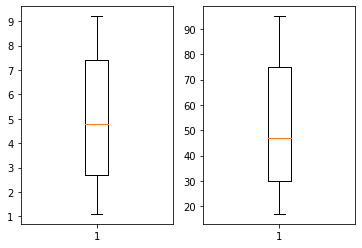

In [ ]:
figr,axr =  plt.subplots(1,2)
axr[0].boxplot(data['Hours'])
axr[1].boxplot(data['Scores'])
plt.show()

### * data does not have any outliers 

## 3) reshaping data because it only contains one dimension

In [ ]:
X=data['Hours'].values.reshape(-1,1)
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

## 4) using different regression models for regression analysis

In [ ]:
regr1=LinearRegression()
regr2 = BayesianRidge()
regr3 = svm.SVR()
regr4 = KNeighborsRegressor()
regr5 = tree.DecisionTreeRegressor()
regr6= VotingRegressor(estimators=[['LR',regr1],['BR',regr2],['KN',regr4],['DT',regr5]])
regr6

VotingRegressor(estimators=[['LR',
                             LinearRegression(copy_X=True, fit_intercept=True,
                                              n_jobs=None, normalize=False)],
                            ['BR',
                             BayesianRidge(alpha_1=1e-06, alpha_2=1e-06,
                                           alpha_init=None, compute_score=False,
                                           copy_X=True, fit_intercept=True,
                                           lambda_1=1e-06, lambda_2=1e-06,
                                           lambda_init=None, n_iter=300,
                                           normalize=False, tol=0.001,
                                           verbose=False)],
                            ['KN',
                             KNeighborsRegress...
                                                 n_jobs=None, n_neighbors=5,
                                                 p=2, weights='uniform')],
                           

## 5) spliting the data into train and test

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,data['Scores'],test_size=0.5,random_state=1)

## 6) training data with each model

In [ ]:
regr1.fit(X_train,y_train)
regr2.fit(X_train,y_train)
regr3.fit(X_train,y_train)
regr4.fit(X_train,y_train)
regr5.fit(X_train,y_train)
regr6.fit(X_train,y_train)

VotingRegressor(estimators=[['LR',
                             LinearRegression(copy_X=True, fit_intercept=True,
                                              n_jobs=None, normalize=False)],
                            ['BR',
                             BayesianRidge(alpha_1=1e-06, alpha_2=1e-06,
                                           alpha_init=None, compute_score=False,
                                           copy_X=True, fit_intercept=True,
                                           lambda_1=1e-06, lambda_2=1e-06,
                                           lambda_init=None, n_iter=300,
                                           normalize=False, tol=0.001,
                                           verbose=False)],
                            ['KN',
                             KNeighborsRegress...
                                                 n_jobs=None, n_neighbors=5,
                                                 p=2, weights='uniform')],
                           

## 7) ploting prediction and actual data

In [ ]:
Y_pred1 = regr1.predict(X)
Y_pred2 = regr2.predict(X)
Y_pred3 = regr3.predict(X)
Y_pred4 = regr4.predict(X)
Y_pred5 = regr5.predict(X)
Y_pred6 = regr6.predict(X)

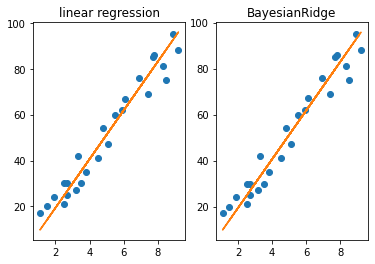

In [ ]:
figure, axis = plt.subplots(1,2)

axis[0].plot(data['Hours'],data['Scores'],'o')
axis[0].plot(X,Y_pred1)
axis[0].set_title('linear regression')

axis[1].plot(data['Hours'],data['Scores'],'o')
axis[1].plot(X,Y_pred2)
axis[1].set_title('BayesianRidge')
plt.show()

## 8) evaluation of the test

In [ ]:
y_pred_test1=regr1.predict(X_test)
y_pred_test2=regr2.predict(X_test)
y_pred_test3=regr3.predict(X_test)
y_pred_test4=regr4.predict(X_test)
y_pred_test5=regr5.predict(X_test)
y_pred_test6=regr6.predict(X_test)

In [ ]:
scoretest = pd.DataFrame({'hours':X_test.reshape(13) ,'Actual Scores': y_test, 'Predicted linearregression': y_pred_test1, 'Predicted BayesianRidge': y_pred_test2, 'Predicted SVM': y_pred_test3,
                           'Predicted KNN': y_pred_test4,'Predicted Decisiontree regression': y_pred_test5,'Predicted ensemblemethod': y_pred_test6})


In [ ]:
scoretest

,hours,Actual Scores,Predicted linearregression,Predicted BayesianRidge,Predicted SVM,Predicted KNN,Predicted Decisiontree regression,Predicted ensemblemethod
14,1.1,17,9.752616,9.861033,41.212913,26.2,20.0,16.453412
13,3.3,42,33.149458,33.197235,40.598793,30.4,35.0,32.936673
17,1.9,24,18.260558,18.346925,40.250769,26.2,20.0,20.701871
3,8.5,75,88.451084,88.355530,48.486615,80.0,81.0,84.451654
21,4.8,54,49.101850,49.108282,43.998290,42.0,47.0,46.802533
10,7.7,85,79.943142,79.869638,48.821135,80.0,86.0,81.453195
18,6.1,67,62.927257,62.897855,47.206193,62.4,62.0,62.556278
19,7.4,69,76.752663,76.687429,48.760910,80.0,86.0,79.860023
4,3.5,30,35.276443,35.318708,40.909923,30.4,35.0,33.998788
2,3.2,27,32.085965,32.136499,40.466640,30.4,25.0,29.905616


### *  metrics test with MAPE(mean absolute percentage error)

In [ ]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [ ]:
from sklearn import metrics
print('{:<25} : {}{}'.format('MAPE for linear',round(MAPE(y_test, y_pred_test1),2),'%'))  
print('{:<25} : {}{}'.format('MAPE for BayesianRidge',round(MAPE(y_test, y_pred_test2),2),'%'))  
print('{:<25} : {}{}'.format('MAPE for SVM',round(MAPE(y_test, y_pred_test3),2),'%'))  
print('{:<25} : {}{}'.format('MAPE for KNeign',round(MAPE(y_test, y_pred_test4),2),'%'))  
print('{:<25} : {}{}'.format('MAPE for Decisiontree',round(MAPE(y_test, y_pred_test5),2),'%'))  
print('{:<25} : {}{}'.format('MAPE for Votingensemble',round(MAPE(y_test, y_pred_test6),2),'%'))  

MAPE for linear           : 15.37%
MAPE for BayesianRidge    : 15.28%
MAPE for SVM              : 42.91%
MAPE for KNeign           : 15.17%
MAPE for Decisiontree     : 13.51%
MAPE for Votingensemble   : 11.04%


In [ ]:
print('{:<45} : {}'.format('prediction for 9.25hours by linear',regr1.predict([[9.25]])[0]))
print('{:<45} : {}'.format('prediction for 9.25hours by BayesianRidge',regr2.predict([[9.25]])[0]))
print('{:<45} : {}'.format('prediction for 9.25hours by SVM',regr3.predict([[9.25]])[0]))
print('{:<45} : {}'.format('prediction for 9.25hours by KNeign',regr4.predict([[9.25]])[0]))
print('{:<45} : {}'.format('prediction for 9.25hours by Decisiontree',regr5.predict([[9.25]])[0]))
print('{:<45} : {}'.format('prediction for 9.25hours by Votingensemble',regr6.predict([[9.25]])[0]))


prediction for 9.25hours by linear            : 96.42728050984495
prediction for 9.25hours by BayesianRidge     : 96.31105336336296
prediction for 9.25hours by SVM               : 47.69064538415985
prediction for 9.25hours by KNeign            : 80.0
prediction for 9.25hours by Decisiontree      : 95.0
prediction for 9.25hours by Votingensemble    : 91.93458346830198


## 9) final result

### with 11%  error which is less camparing with other model, Voting emsemble model's prediction is :-

###***for 9.25 hours you can score 91.9 marks***

# space

In [ ]:
'''
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
'''

#task 2 Prediction using Unsupervised ML

## **for this task there are 6 sections as follows :
## 1)data importing with pandas
## 2) checking for outliers
## 3) making dependent and independent values
## 4) creating and fitting KMEANS clusters model
## 5) coloring the predicted clusters
## 6) 3d graphical represtation of the clusters

### **the following are the neccessary packages for the task

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.cluster import KMeans,Birch,DBSCAN,AffinityPropagation,OPTICS
import matplotlib.pyplot as plt
import numpy as np

## 1)data importing with pandas

In [ ]:
data2=pd.read_csv('Iris.csv')
data2

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## 2) checking for outliers


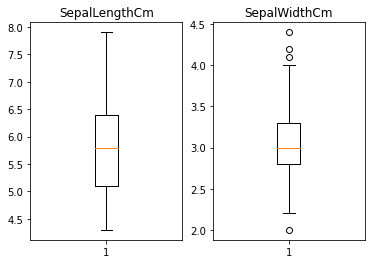

In [ ]:
figr,axr =  plt.subplots(1,2)
axr[0].boxplot(data2['SepalLengthCm'])
axr[1].boxplot(data2['SepalWidthCm'])
axr[0].set_title('SepalLengthCm')
axr[1].set_title('SepalWidthCm')
plt.show()

***outliers exists in SepalWidthCm***

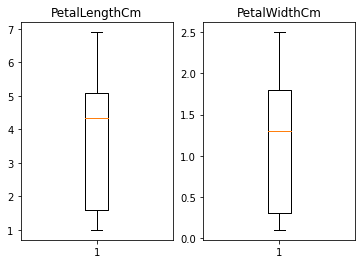

In [ ]:
figr,axr =  plt.subplots(1,2)
axr[0].boxplot(data2['PetalLengthCm'])
axr[1].boxplot(data2['PetalWidthCm'])
axr[0].set_title('PetalLengthCm')
axr[1].set_title('PetalWidthCm')
plt.show()

***removing outliers***

In [ ]:
q1cl=data2['SepalWidthCm'].quantile(0.25)
q3cl=data2['SepalWidthCm'].quantile(0.75)
iqrcl=q3cl-q1cl
mincl=q1cl-(1*iqrcl)
maxcl=q3cl+(1*iqrcl)
print(mincl,maxcl)

2.3 3.8


In [ ]:
data2=data2[data2['SepalWidthCm']>=mincl]
data2=data2[data2['SepalWidthCm']<=maxcl]
data2

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


***after removing outliers***

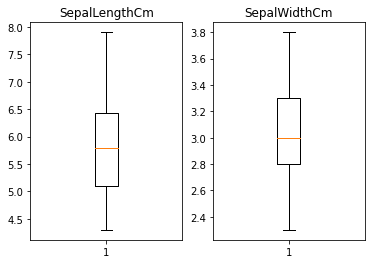

In [ ]:
figr,axr =  plt.subplots(1,2)
axr[0].boxplot(data2['SepalLengthCm'])
axr[1].boxplot(data2['SepalWidthCm'])
axr[0].set_title('SepalLengthCm')
axr[1].set_title('SepalWidthCm')
plt.show()

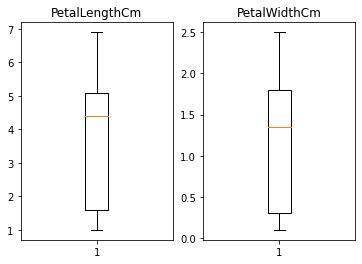

In [ ]:
figr,axr =  plt.subplots(1,2)
axr[0].boxplot(data2['PetalLengthCm'])
axr[1].boxplot(data2['PetalWidthCm'])
axr[0].set_title('PetalLengthCm')
axr[1].set_title('PetalWidthCm')
plt.show()

In [ ]:
data2['Species'].unique() #all unique cluster names

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## 3) making dependent and independent values


In [ ]:
xcl=data2.iloc[:,1:-1].values
ycl=data2.iloc[:,-1:].values
xcl

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [4.9, 3.1, 1.5, 0.1],
       [5. , 3.2, 1.2, 0.2],
       [5.5, 3.5, 1.3, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [4.4, 3. , 1.3, 0.2],
       [5.1, 3.4, 1.5, 0.2],
       [5. , 3

## 4) creating and fitting KMEANS clusters model

In [ ]:
clus1=KMeans(n_clusters=3,random_state=1).fit(xcl)
clus1


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

***the optimal number of clusters are 3***

## 5) coloring the predicted clusters

In [ ]:
data2['clus']=clus1.predict(xcl)
data2['color']=data2.clus.map({0:'red',1:'yellow',2:'blue'})
data2

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,clus,color
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1,yellow
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1,yellow
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1,yellow
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1,yellow
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1,yellow
...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2,blue
146,147,6.3,2.5,5.0,1.9,Iris-virginica,0,red
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2,blue
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2,blue


## 6) 3d graphical represtation of the clusters

### graph for SepalLengthCm SepalWidthCm PetalLengthCm

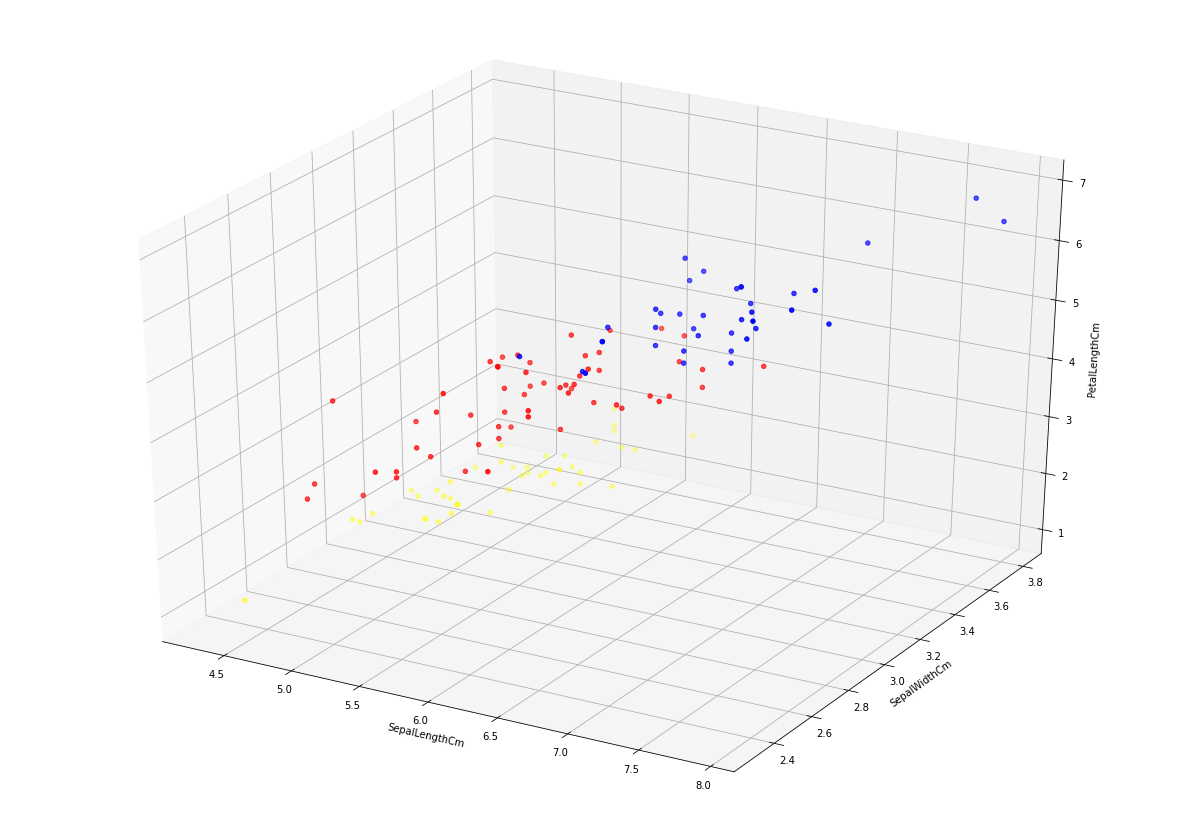

In [ ]:
figcl=plt.figure(figsize=(21,15))
axcl=plt.axes(projection='3d')
axcl.scatter(data2['SepalLengthCm'],data2['SepalWidthCm'],data2['PetalLengthCm'],c=data2.color)
axcl.set_xlabel('SepalLengthCm')
axcl.set_ylabel('SepalWidthCm')
axcl.set_zlabel('PetalLengthCm')
plt.show()

### graph for SepalLengthCm SepalWidthCm PetalWidthCm


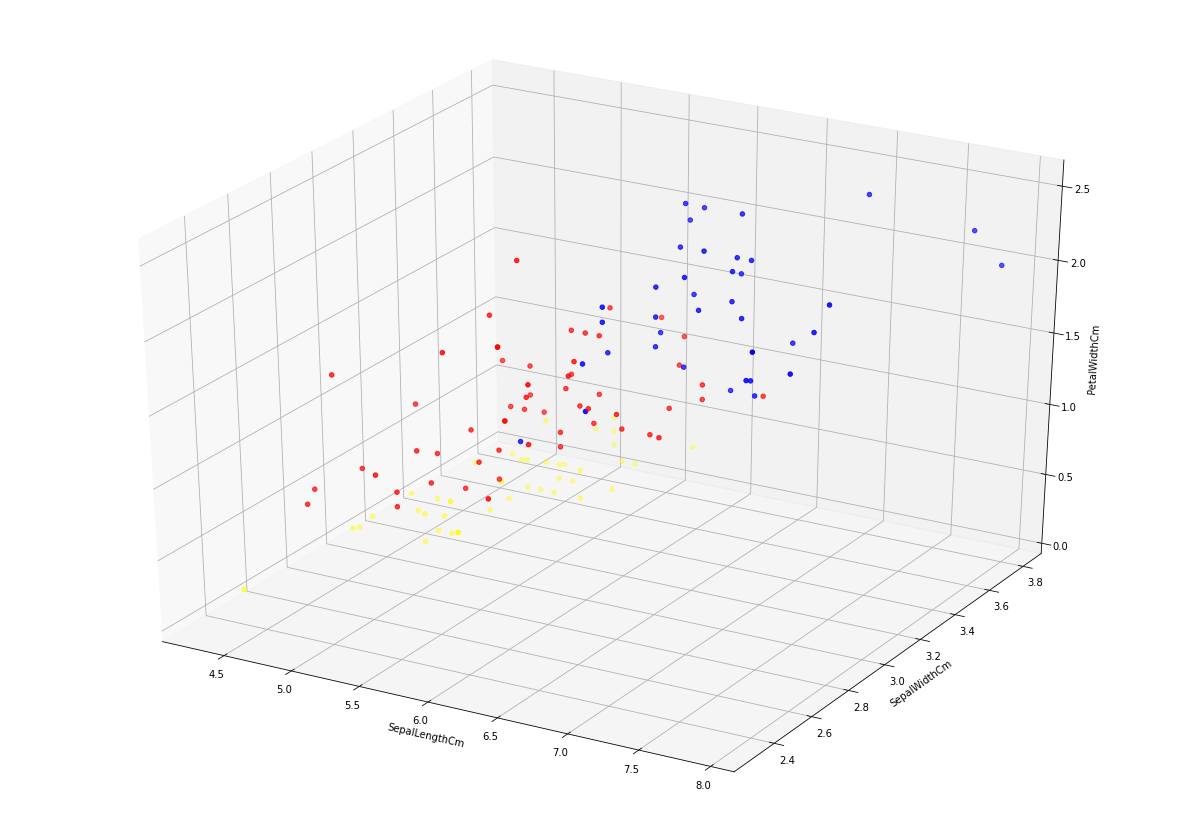

In [ ]:
figcl=plt.figure(figsize=(21,15))
axcl=plt.axes(projection='3d')
axcl.scatter(data2['SepalLengthCm'],data2['SepalWidthCm'],data2['PetalWidthCm'],c=data2.color)
axcl.set_xlabel('SepalLengthCm')
axcl.set_ylabel('SepalWidthCm')
axcl.set_zlabel('PetalWidthCm')
plt.show()

### graph for PetalWidthCm SepalWidthCm PetalLengthCm  


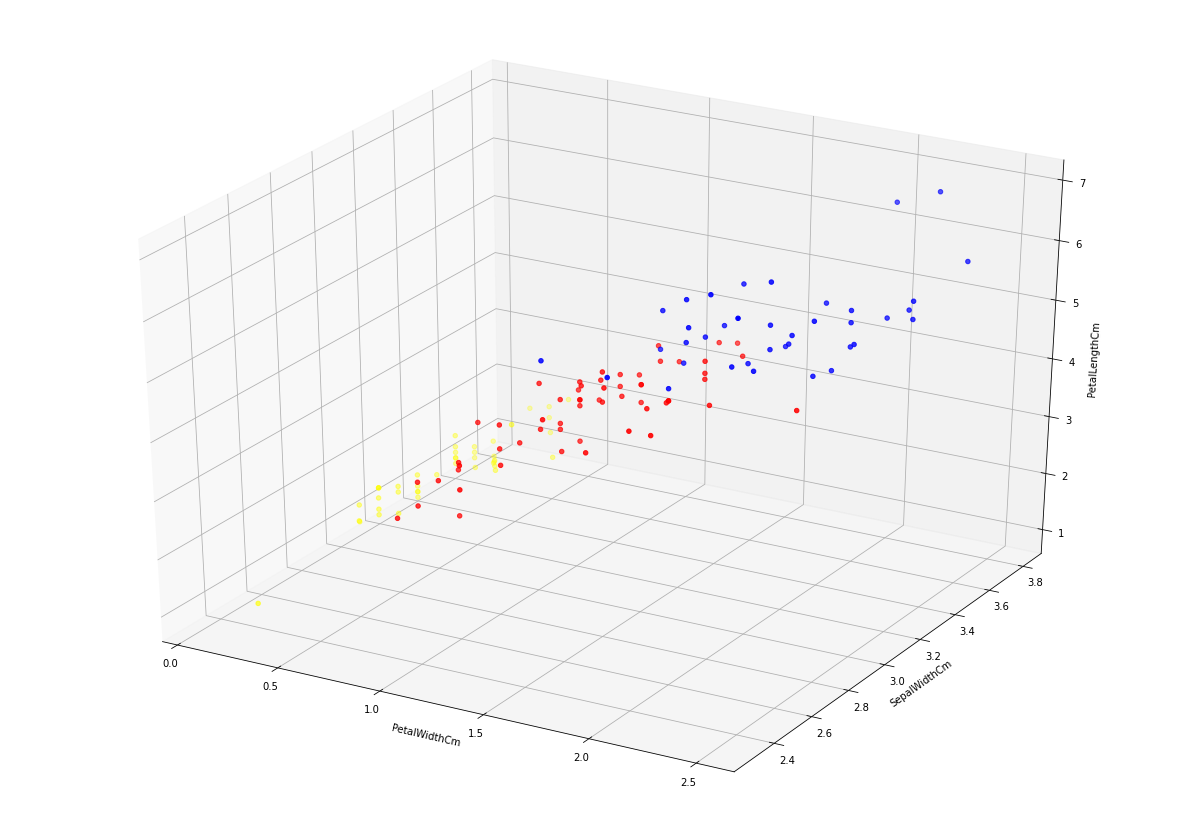

In [ ]:
figcl=plt.figure(figsize=(21,15))
axcl=plt.axes(projection='3d')
axcl.scatter(data2['PetalWidthCm'],data2['SepalWidthCm'],data2['PetalLengthCm'],c=data2.color)
axcl.set_xlabel('PetalWidthCm')
axcl.set_ylabel('SepalWidthCm')
axcl.set_zlabel('PetalLengthCm')
plt.show()

# space

In [ ]:
'''
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
'''

#task 6 Prediction using Decision Tree Algorithm

## **for this task there are 6 sections as follows :
## 1)data importing with pandas
## 2) checking for outliers
## 3) making dependent and independent values
## 4) creating and fitting Decision tree Classifier model
## 5) evaluation of the test
## 6) tree building
### **the following are the neccessary packages for the task

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

## 1)data importing with pandas


In [ ]:
data3=pd.read_csv('Iris.csv')
data3

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## 2) checking for outliers


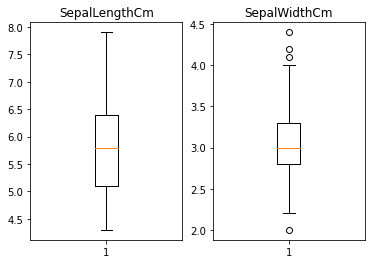

In [ ]:
figcls,axcls =  plt.subplots(1,2)
axcls[0].boxplot(data3['SepalLengthCm'])
axcls[1].boxplot(data3['SepalWidthCm'])
axcls[0].set_title('SepalLengthCm')
axcls[1].set_title('SepalWidthCm')
plt.show()

***outliers exists***

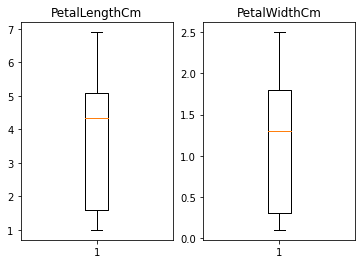

In [ ]:
figcls,axcls =  plt.subplots(1,2)
axcls[0].boxplot(data3['PetalLengthCm'])
axcls[1].boxplot(data3['PetalWidthCm'])
axcls[0].set_title('PetalLengthCm')
axcls[1].set_title('PetalWidthCm')
plt.show()

***removing outliers***

In [ ]:
q1cls=data3['SepalWidthCm'].quantile(0.25)
q3cls=data3['SepalWidthCm'].quantile(0.75)
iqrcls=q3cls-q1cls
mincls=q1cls-(1*iqrcls)
maxcls=q3cls+(1*iqrcls)
print(mincls,maxcls)

2.3 3.8


In [ ]:
data3=data3[data3['SepalWidthCm']>=mincls]
data3=data3[data3['SepalWidthCm']<=maxcls]
#data3

***data after removing outliers***

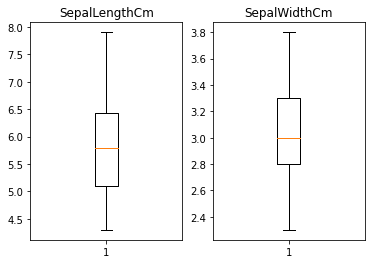

In [ ]:
figcls,axcls =  plt.subplots(1,2)
axcls[0].boxplot(data3['SepalLengthCm'])
axcls[1].boxplot(data3['SepalWidthCm'])
axcls[0].set_title('SepalLengthCm')
axcls[1].set_title('SepalWidthCm')
plt.show()

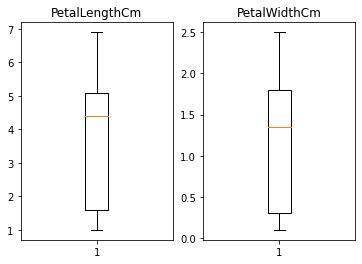

In [ ]:
figcls,axcls =  plt.subplots(1,2)
axcls[0].boxplot(data3['PetalLengthCm'])
axcls[1].boxplot(data3['PetalWidthCm'])
axcls[0].set_title('PetalLengthCm')
axcls[1].set_title('PetalWidthCm')
plt.show()

## 3) spliting the data into train and test


In [ ]:
clsxtrain,clsxtest,clsytrain,clsytest=train_test_split(data3.iloc[:,1:-1].values,
                                                      data3.iloc[:,-1:],test_size=0.3,random_state=1)

## 4) creating and fitting Decision tree Classifier model


In [ ]:
cls1=DecisionTreeClassifier().fit(clsxtrain,clsytrain)
cls1

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## 5) evaluation of the test


In [ ]:
predcls=cls1.predict(clsxtest)

In [ ]:
acc1 = round(metrics.accuracy_score(clsytest, predcls),3)
print('decision tree pred : ',acc1)

decision tree pred :  1.0


***result gave 100% accuracy***

## 6) tree building

### text tree

In [ ]:
sda=tree.export_text(cls1,feature_names=['SepalLengthCm'	,'SepalWidthCm'	,'PetalLengthCm'	,'PetalWidthCm'	])
print(sda)

|--- PetalWidthCm <= 0.80
|   |--- class: Iris-setosa
|--- PetalWidthCm >  0.80
|   |--- PetalWidthCm <= 1.75
|   |   |--- PetalLengthCm <= 5.05
|   |   |   |--- SepalLengthCm <= 5.00
|   |   |   |   |--- PetalWidthCm <= 1.35
|   |   |   |   |   |--- class: Iris-versicolor
|   |   |   |   |--- PetalWidthCm >  1.35
|   |   |   |   |   |--- class: Iris-virginica
|   |   |   |--- SepalLengthCm >  5.00
|   |   |   |   |--- class: Iris-versicolor
|   |   |--- PetalLengthCm >  5.05
|   |   |   |--- SepalLengthCm <= 6.05
|   |   |   |   |--- class: Iris-versicolor
|   |   |   |--- SepalLengthCm >  6.05
|   |   |   |   |--- class: Iris-virginica
|   |--- PetalWidthCm >  1.75
|   |   |--- PetalLengthCm <= 4.85
|   |   |   |--- SepalLengthCm <= 5.95
|   |   |   |   |--- class: Iris-versicolor
|   |   |   |--- SepalLengthCm >  5.95
|   |   |   |   |--- class: Iris-virginica
|   |   |--- PetalLengthCm >  4.85
|   |   |   |--- class: Iris-virginica



### plot tree

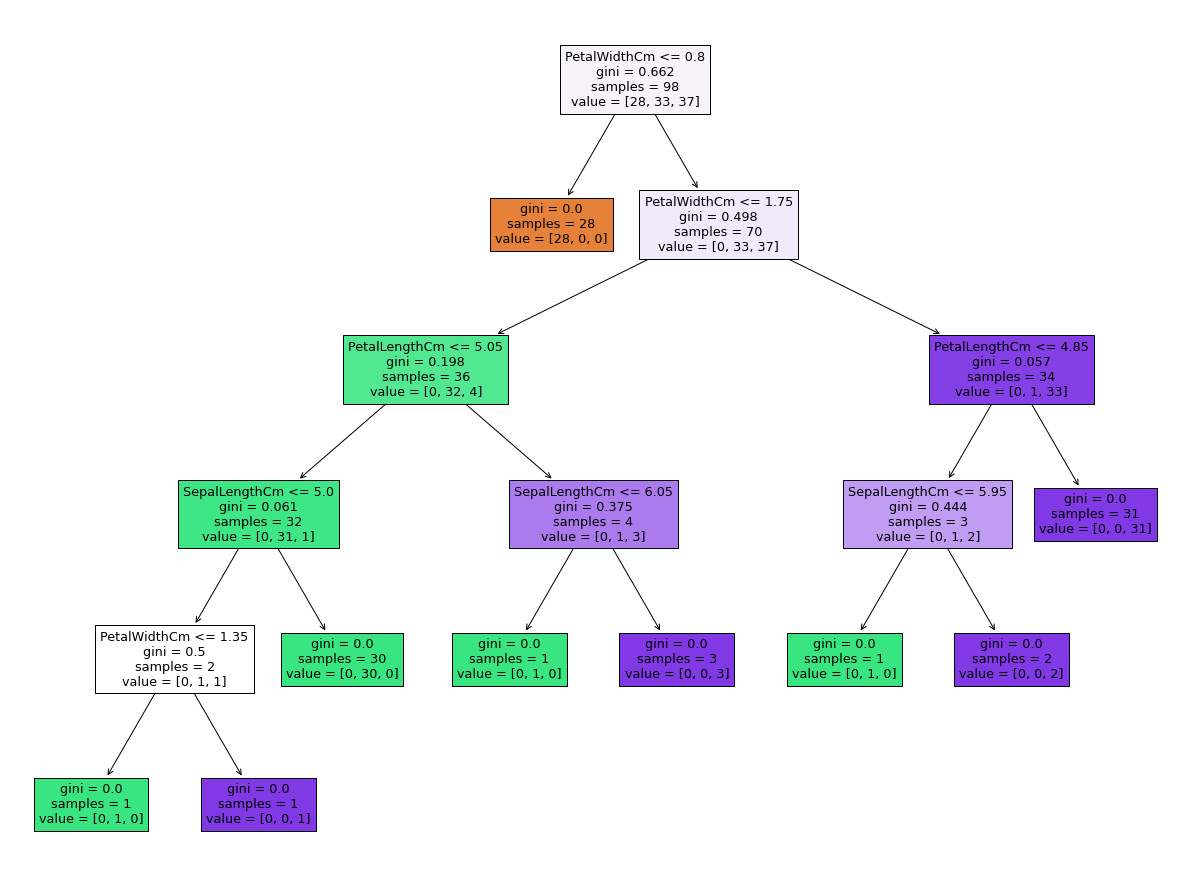

In [ ]:
figcls = plt.figure(figsize=(21,16))
tree.plot_tree(cls1,feature_names=['SepalLengthCm'	,'SepalWidthCm'	,'PetalLengthCm'	,'PetalWidthCm'	],filled=True)
plt.show()